In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

from sklearn.preprocessing import LabelEncoder

In [2]:
df1 = pd.read_csv(r"C:\Users\ricar\Documents\SAIT - Data Science\13. Supervised Learning - Regression\Assignment 1\real_estate_data_chicago.csv")
df1.head()         

,type,text,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,status
0,single_family,"Come check out this amazing, move-in ready, 5 ...",1951.0,4.0,4.0,3.0,1.0,1.0,5615.0,3000.0,2.0,NaN,NaN,750000.0,for_sale
1,single_family,Move in ready 2 story Mount Greenwood home on ...,1922.0,4.0,3.0,2.0,1.0,2.0,6566.0,2900.0,2.0,105000.0,1991-04-16,499900.0,for_sale
2,single_family,Investor Special MONEY MAKING Gem. This is you...,1947.0,4.0,2.0,2.0,NaN,3.0,5375.0,1170.0,2.0,60000.0,2019-10-28,325600.0,for_sale
3,single_family,Renovated Brick 1.5 story house with finished ...,1945.0,4.0,3.0,2.0,1.0,2.0,6138.0,2511.0,2.0,170000.0,1996-05-30,620000.0,for_sale
4,single_family,This almost 3000sq foot home was thoughtfully ...,1907.0,4.0,4.0,2.0,2.0,2.0,8476.0,2870.0,3.0,NaN,NaN,850000.0,for_sale


In [3]:
df1.shape

(2000, 15)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           2000 non-null   object 
 1   text           1992 non-null   object 
 2   year_built     1790 non-null   float64
 3   beds           1940 non-null   float64
 4   baths          1999 non-null   float64
 5   baths_full     1937 non-null   float64
 6   baths_half     592 non-null    float64
 7   garage         1282 non-null   float64
 8   lot_sqft       992 non-null    float64
 9   sqft           1447 non-null   float64
 10  stories        1620 non-null   float64
 11  lastSoldPrice  1415 non-null   float64
 12  soldOn         1415 non-null   object 
 13  listPrice      1994 non-null   float64
 14  status         2000 non-null   object 
dtypes: float64(11), object(4)
memory usage: 234.5+ KB


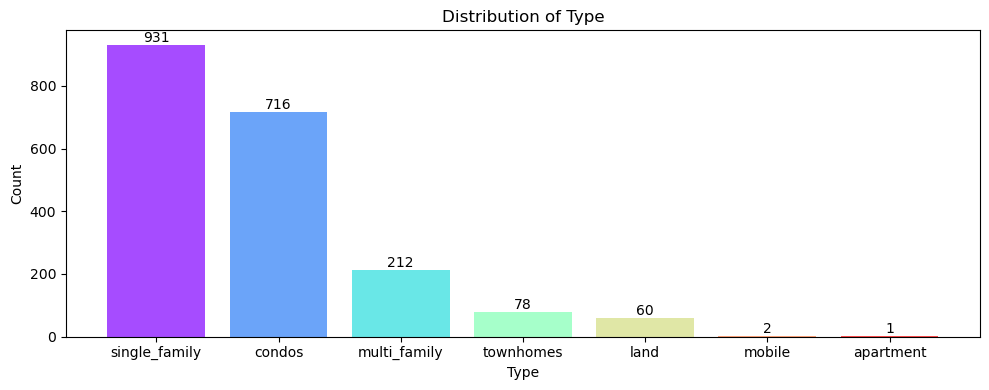

In [5]:
# Assuming you have already calculated type_counts as shown earlier
type_counts = df1['type'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 4))
colors = cm.rainbow(np.linspace(0, 1, len(type_counts)))
bars = plt.bar(type_counts.index, type_counts.values, color=colors, alpha=0.7)

# Adding value labels on the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}', 
             va='bottom', ha='center', color='black', fontsize=10)

plt.title('Distribution of Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks()  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [6]:
# Filter the DataFrame to include only single_family type
df = df1[df1['type'] == 'single_family']
df.head()

,type,text,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,status
0,single_family,"Come check out this amazing, move-in ready, 5 ...",1951.0,4.0,4.0,3.0,1.0,1.0,5615.0,3000.0,2.0,NaN,NaN,750000.0,for_sale
1,single_family,Move in ready 2 story Mount Greenwood home on ...,1922.0,4.0,3.0,2.0,1.0,2.0,6566.0,2900.0,2.0,105000.0,1991-04-16,499900.0,for_sale
2,single_family,Investor Special MONEY MAKING Gem. This is you...,1947.0,4.0,2.0,2.0,NaN,3.0,5375.0,1170.0,2.0,60000.0,2019-10-28,325600.0,for_sale
3,single_family,Renovated Brick 1.5 story house with finished ...,1945.0,4.0,3.0,2.0,1.0,2.0,6138.0,2511.0,2.0,170000.0,1996-05-30,620000.0,for_sale
4,single_family,This almost 3000sq foot home was thoughtfully ...,1907.0,4.0,4.0,2.0,2.0,2.0,8476.0,2870.0,3.0,NaN,NaN,850000.0,for_sale


In [7]:
df.shape

(931, 15)

In [8]:
df.drop('text', axis = 1, inplace=True)
df.head()

C:\Users\ricar\AppData\Local\Temp\ipykernel_14852\2170186228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('text', axis = 1, inplace=True)


,type,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,status
0,single_family,1951.0,4.0,4.0,3.0,1.0,1.0,5615.0,3000.0,2.0,NaN,NaN,750000.0,for_sale
1,single_family,1922.0,4.0,3.0,2.0,1.0,2.0,6566.0,2900.0,2.0,105000.0,1991-04-16,499900.0,for_sale
2,single_family,1947.0,4.0,2.0,2.0,NaN,3.0,5375.0,1170.0,2.0,60000.0,2019-10-28,325600.0,for_sale
3,single_family,1945.0,4.0,3.0,2.0,1.0,2.0,6138.0,2511.0,2.0,170000.0,1996-05-30,620000.0,for_sale
4,single_family,1907.0,4.0,4.0,2.0,2.0,2.0,8476.0,2870.0,3.0,NaN,NaN,850000.0,for_sale


In [9]:
df.drop('type', axis = 1, inplace=True)
df.head()

C:\Users\ricar\AppData\Local\Temp\ipykernel_14852\3161396484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('type', axis = 1, inplace=True)


,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,status
0,1951.0,4.0,4.0,3.0,1.0,1.0,5615.0,3000.0,2.0,NaN,NaN,750000.0,for_sale
1,1922.0,4.0,3.0,2.0,1.0,2.0,6566.0,2900.0,2.0,105000.0,1991-04-16,499900.0,for_sale
2,1947.0,4.0,2.0,2.0,NaN,3.0,5375.0,1170.0,2.0,60000.0,2019-10-28,325600.0,for_sale
3,1945.0,4.0,3.0,2.0,1.0,2.0,6138.0,2511.0,2.0,170000.0,1996-05-30,620000.0,for_sale
4,1907.0,4.0,4.0,2.0,2.0,2.0,8476.0,2870.0,3.0,NaN,NaN,850000.0,for_sale


In [10]:
df.status.unique()

array(['for_sale', 'ready_to_build'], dtype=object)

In [11]:
df[df['status'] == 'ready_to_build']

,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,status
245,NaN,4.0,NaN,3.0,NaN,NaN,NaN,4500.0,NaN,NaN,NaN,1600000.0,ready_to_build


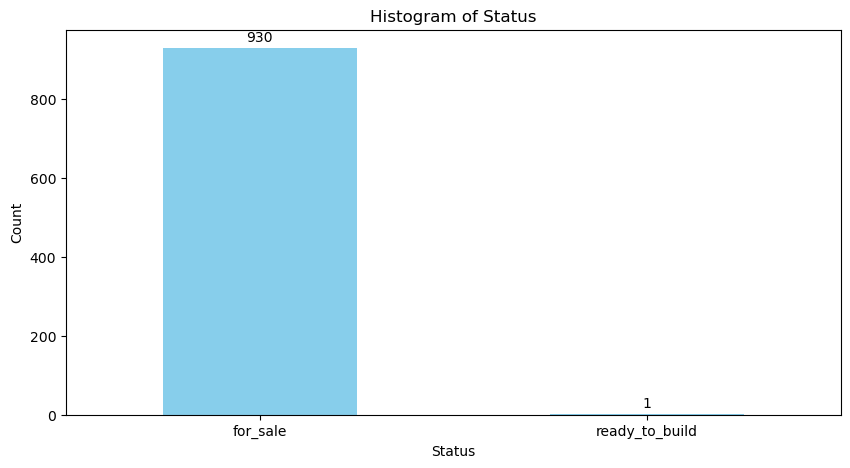

In [12]:
import matplotlib.pyplot as plt

# Get the unique values and their counts
status_counts = df['status'].value_counts()

# Plot the histogram
plt.figure(figsize=(10, 5))
bars = status_counts.plot(kind='bar', color='skyblue')

# Add labels to the bars
for bar in bars.containers[0]:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Histogram of Status')
plt.xticks(rotation=0)
plt.show()

In [13]:
# Drop readytobuild row
df = df.drop(df[df['status'] == 'ready_to_build'].index)
df[df['status'] == 'ready_to_build']

,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,status


In [14]:
df.drop('status', axis = 1, inplace=True)
df.head()

,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice
0,1951.0,4.0,4.0,3.0,1.0,1.0,5615.0,3000.0,2.0,NaN,NaN,750000.0
1,1922.0,4.0,3.0,2.0,1.0,2.0,6566.0,2900.0,2.0,105000.0,1991-04-16,499900.0
2,1947.0,4.0,2.0,2.0,NaN,3.0,5375.0,1170.0,2.0,60000.0,2019-10-28,325600.0
3,1945.0,4.0,3.0,2.0,1.0,2.0,6138.0,2511.0,2.0,170000.0,1996-05-30,620000.0
4,1907.0,4.0,4.0,2.0,2.0,2.0,8476.0,2870.0,3.0,NaN,NaN,850000.0


In [15]:
df.columns

Index(['year_built', 'beds', 'baths', 'baths_full', 'baths_half', 'garage',
       'lot_sqft', 'sqft', 'stories', 'lastSoldPrice', 'soldOn', 'listPrice'],
      dtype='object')

In [16]:
df[['year_built', 'beds', 'baths', 'baths_full', 'baths_half',
       'garage', 'lot_sqft', 'sqft', 'stories', 'lastSoldPrice',
       'listPrice']].corr()

,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,listPrice
year_built,1.000000,-0.007736,0.104704,0.082106,0.015531,0.133710,0.023246,0.092106,-0.121508,0.150468,0.137214
beds,-0.007736,1.000000,0.659502,0.644095,0.373162,0.312582,-0.011350,0.621515,0.504950,0.406465,0.462024
baths,0.104704,0.659502,1.000000,0.893652,0.660660,0.327343,-0.034327,0.851968,0.515954,0.652525,0.726572
baths_full,0.082106,0.644095,0.893652,1.000000,0.394466,0.299303,-0.036225,0.773972,0.465388,0.595475,0.650916
baths_half,0.015531,0.373162,0.660660,0.394466,1.000000,0.238137,0.288064,0.609479,0.319682,0.352669,0.536098
garage,0.133710,0.312582,0.327343,0.299303,0.238137,1.000000,0.007499,0.347018,0.191087,0.270433,0.301121
lot_sqft,0.023246,-0.011350,-0.034327,-0.036225,0.288064,0.007499,1.000000,-0.010278,0.161890,0.024017,-0.003822
sqft,0.092106,0.621515,0.851968,0.773972,0.609479,0.347018,-0.010278,1.000000,0.482130,0.721137,0.873269
stories,-0.121508,0.504950,0.515954,0.465388,0.319682,0.191087,0.161890,0.482130,1.000000,0.434028,0.360543
lastSoldPrice,0.150468,0.406465,0.652525,0.595475,0.352669,0.270433,0.024017,0.721137,0.434028,1.000000,0.879233


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 930 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year_built     877 non-null    float64
 1   beds           930 non-null    float64
 2   baths          930 non-null    float64
 3   baths_full     929 non-null    float64
 4   baths_half     409 non-null    float64
 5   garage         742 non-null    float64
 6   lot_sqft       742 non-null    float64
 7   sqft           833 non-null    float64
 8   stories        827 non-null    float64
 9   lastSoldPrice  663 non-null    float64
 10  soldOn         663 non-null    object 
 11  listPrice      928 non-null    float64
dtypes: float64(11), object(1)
memory usage: 94.5+ KB


In [18]:
year_built_column = df.year_built.describe()
year_built_column

count     877.000000
mean     1936.541619
std        33.252592
min      1856.000000
25%      1915.000000
50%      1930.000000
75%      1955.000000
max      2024.000000
Name: year_built, dtype: float64

In [19]:
# Filter the DataFrame to remove rows where year_built is lower than 1889
df_year = df[df['year_built'] > 1900]

df_year.head()

,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice
0,1951.0,4.0,4.0,3.0,1.0,1.0,5615.0,3000.0,2.0,NaN,NaN,750000.0
1,1922.0,4.0,3.0,2.0,1.0,2.0,6566.0,2900.0,2.0,105000.0,1991-04-16,499900.0
2,1947.0,4.0,2.0,2.0,NaN,3.0,5375.0,1170.0,2.0,60000.0,2019-10-28,325600.0
3,1945.0,4.0,3.0,2.0,1.0,2.0,6138.0,2511.0,2.0,170000.0,1996-05-30,620000.0
4,1907.0,4.0,4.0,2.0,2.0,2.0,8476.0,2870.0,3.0,NaN,NaN,850000.0


In [20]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 743 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year_built     743 non-null    float64
 1   beds           743 non-null    float64
 2   baths          743 non-null    float64
 3   baths_full     743 non-null    float64
 4   baths_half     309 non-null    float64
 5   garage         626 non-null    float64
 6   lot_sqft       578 non-null    float64
 7   sqft           686 non-null    float64
 8   stories        651 non-null    float64
 9   lastSoldPrice  513 non-null    float64
 10  soldOn         513 non-null    object 
 11  listPrice      741 non-null    float64
dtypes: float64(11), object(1)
memory usage: 75.5+ KB


In [21]:
df_year[['year_built', 'beds', 'baths', 'baths_full', 'baths_half',
       'garage', 'lot_sqft', 'sqft', 'stories', 'lastSoldPrice',
       'listPrice']].corr()

,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,listPrice
year_built,1.000000,0.139528,0.297035,0.249452,0.099681,0.214749,0.016930,0.260271,0.021144,0.378899,0.277808
beds,0.139528,1.000000,0.663199,0.639811,0.432384,0.336378,-0.015931,0.611856,0.451325,0.419634,0.444096
baths,0.297035,0.663199,1.000000,0.886273,0.646103,0.409725,-0.043231,0.832503,0.486500,0.662679,0.692224
baths_full,0.249452,0.639811,0.886273,1.000000,0.394013,0.367351,-0.043474,0.749845,0.439893,0.595022,0.613217
baths_half,0.099681,0.432384,0.646103,0.394013,1.000000,0.333983,0.350238,0.608124,0.342499,0.370062,0.508838
garage,0.214749,0.336378,0.409725,0.367351,0.333983,1.000000,0.004446,0.440218,0.260201,0.402487,0.413013
lot_sqft,0.016930,-0.015931,-0.043231,-0.043474,0.350238,0.004446,1.000000,-0.013845,0.143901,-0.012947,-0.003445
sqft,0.260271,0.611856,0.832503,0.749845,0.608124,0.440218,-0.013845,1.000000,0.442443,0.717605,0.858853
stories,0.021144,0.451325,0.486500,0.439893,0.342499,0.260201,0.143901,0.442443,1.000000,0.420454,0.338613
lastSoldPrice,0.378899,0.419634,0.662679,0.595022,0.370062,0.402487,-0.012947,0.717605,0.420454,1.000000,0.864864


In [22]:
# Convert 'soldOn' to datetime format and extract the year
df_year['soldOn'] = pd.to_datetime(df['soldOn']).dt.year
df_year.head()

C:\Users\ricar\AppData\Local\Temp\ipykernel_14852\457161054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['soldOn'] = pd.to_datetime(df['soldOn']).dt.year


,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice
0,1951.0,4.0,4.0,3.0,1.0,1.0,5615.0,3000.0,2.0,NaN,NaN,750000.0
1,1922.0,4.0,3.0,2.0,1.0,2.0,6566.0,2900.0,2.0,105000.0,1991.0,499900.0
2,1947.0,4.0,2.0,2.0,NaN,3.0,5375.0,1170.0,2.0,60000.0,2019.0,325600.0
3,1945.0,4.0,3.0,2.0,1.0,2.0,6138.0,2511.0,2.0,170000.0,1996.0,620000.0
4,1907.0,4.0,4.0,2.0,2.0,2.0,8476.0,2870.0,3.0,NaN,NaN,850000.0


In [23]:
df_year[['year_built', 'beds', 'baths', 'baths_full', 'baths_half',
       'garage', 'lot_sqft', 'sqft', 'stories', 'lastSoldPrice', 'soldOn',
       'listPrice']].corr()

,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice
year_built,1.000000,0.139528,0.297035,0.249452,0.099681,0.214749,0.016930,0.260271,0.021144,0.378899,0.107062,0.277808
beds,0.139528,1.000000,0.663199,0.639811,0.432384,0.336378,-0.015931,0.611856,0.451325,0.419634,0.101091,0.444096
baths,0.297035,0.663199,1.000000,0.886273,0.646103,0.409725,-0.043231,0.832503,0.486500,0.662679,0.196718,0.692224
baths_full,0.249452,0.639811,0.886273,1.000000,0.394013,0.367351,-0.043474,0.749845,0.439893,0.595022,0.225264,0.613217
baths_half,0.099681,0.432384,0.646103,0.394013,1.000000,0.333983,0.350238,0.608124,0.342499,0.370062,0.039921,0.508838
garage,0.214749,0.336378,0.409725,0.367351,0.333983,1.000000,0.004446,0.440218,0.260201,0.402487,0.073407,0.413013
lot_sqft,0.016930,-0.015931,-0.043231,-0.043474,0.350238,0.004446,1.000000,-0.013845,0.143901,-0.012947,0.021266,-0.003445
sqft,0.260271,0.611856,0.832503,0.749845,0.608124,0.440218,-0.013845,1.000000,0.442443,0.717605,0.192797,0.858853
stories,0.021144,0.451325,0.486500,0.439893,0.342499,0.260201,0.143901,0.442443,1.000000,0.420454,0.116803,0.338613
lastSoldPrice,0.378899,0.419634,0.662679,0.595022,0.370062,0.402487,-0.012947,0.717605,0.420454,1.000000,0.253721,0.864864


In [24]:
missing_df =  df_year.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len( df_year))*100,2)
missing_df

,Total No. of Missing Values,% of Missing Values
year_built,0,0.00
beds,0,0.00
baths,0,0.00
baths_full,0,0.00
baths_half,434,58.41
garage,117,15.75
lot_sqft,165,22.21
sqft,57,7.67
stories,92,12.38
lastSoldPrice,230,30.96


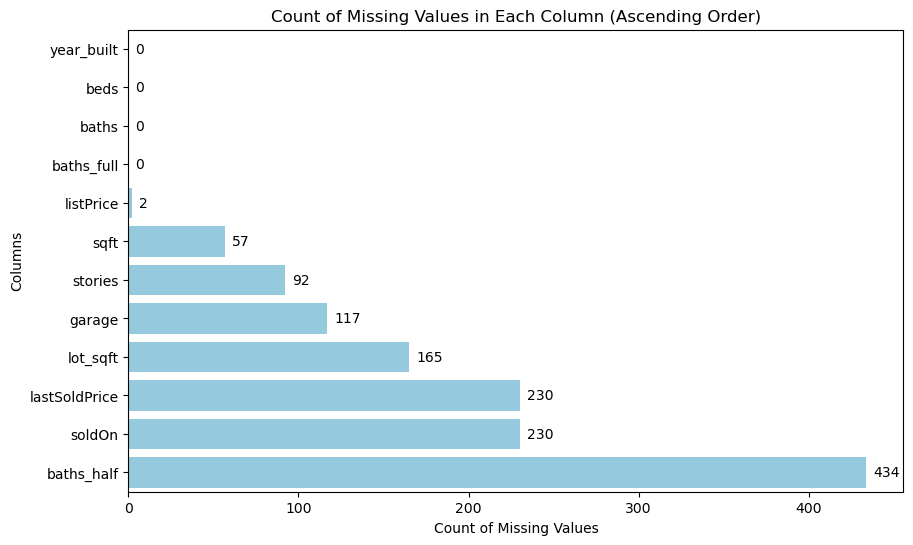

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the count of missing values for each column
missing_values_count = df_year.isnull().sum()

# Sort the missing values count
missing_values_count_sorted = missing_values_count.sort_values()

# Plot the count of missing values
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=missing_values_count_sorted, y=missing_values_count_sorted.index, color='skyblue')

# Add labels to the bars
for bar in bars.containers[0]:
    width = bar.get_width()
    bars.annotate('{}'.format(int(width)),
                 xy=(width, bar.get_y() + bar.get_height() / 2),
                 xytext=(5, 0),  # 5 points horizontal offset
                 textcoords="offset points",
                 ha='left', va='center')

# Set plot labels and title
plt.title('Count of Missing Values in Each Column (Ascending Order)')
plt.xlabel('Count of Missing Values')
plt.ylabel('Columns')
plt.show()

In [26]:
df_year[pd.isna(df_year['listPrice'])]

,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice
1255,1937.0,4.0,2.0,2.0,NaN,1.0,3772.0,1542.0,2.0,230000.0,2020.0,NaN
1676,1926.0,3.0,2.0,2.0,NaN,2.0,4835.0,1176.0,2.0,195000.0,2014.0,NaN


In [27]:
df_year.dropna(subset=['listPrice'], inplace=True)
df_year[pd.isna(df['listPrice'])]

C:\Users\ricar\AppData\Local\Temp\ipykernel_14852\227137119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year.dropna(subset=['listPrice'], inplace=True)
C:\Users\ricar\AppData\Local\Temp\ipykernel_14852\227137119.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_year[pd.isna(df['listPrice'])]


,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice


In [28]:
df_year.isnull().sum()

year_built         0
beds               0
baths              0
baths_full         0
baths_half       432
garage           117
lot_sqft         165
sqft              57
stories           92
lastSoldPrice    230
soldOn           230
listPrice          0
dtype: int64

In [29]:
df_year['baths_half'].fillna(0, inplace=True)
df_year.head()

C:\Users\ricar\AppData\Local\Temp\ipykernel_14852\3140463250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['baths_half'].fillna(0, inplace=True)


,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice
0,1951.0,4.0,4.0,3.0,1.0,1.0,5615.0,3000.0,2.0,NaN,NaN,750000.0
1,1922.0,4.0,3.0,2.0,1.0,2.0,6566.0,2900.0,2.0,105000.0,1991.0,499900.0
2,1947.0,4.0,2.0,2.0,0.0,3.0,5375.0,1170.0,2.0,60000.0,2019.0,325600.0
3,1945.0,4.0,3.0,2.0,1.0,2.0,6138.0,2511.0,2.0,170000.0,1996.0,620000.0
4,1907.0,4.0,4.0,2.0,2.0,2.0,8476.0,2870.0,3.0,NaN,NaN,850000.0


In [30]:
df_year.garage.value_counts()

garage
2.0    509
1.0     76
3.0     28
4.0     10
5.0      1
Name: count, dtype: int64

In [31]:
df_year['garage'].fillna(df_year['garage'].median(), inplace=True)
df_year.isnull().sum()

C:\Users\ricar\AppData\Local\Temp\ipykernel_14852\476913265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['garage'].fillna(df_year['garage'].median(), inplace=True)


year_built         0
beds               0
baths              0
baths_full         0
baths_half         0
garage             0
lot_sqft         165
sqft              57
stories           92
lastSoldPrice    230
soldOn           230
listPrice          0
dtype: int64

In [32]:
df_year.stories.value_counts()

stories
2.0    438
1.0    157
3.0     52
4.0      2
Name: count, dtype: int64

In [33]:
df_year['stories'].fillna(df_year['stories'].median(), inplace=True)
df_year.isnull().sum()

C:\Users\ricar\AppData\Local\Temp\ipykernel_14852\3832604682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['stories'].fillna(df_year['stories'].median(), inplace=True)


year_built         0
beds               0
baths              0
baths_full         0
baths_half         0
garage             0
lot_sqft         165
sqft              57
stories            0
lastSoldPrice    230
soldOn           230
listPrice          0
dtype: int64

In [34]:
df_year.soldOn.value_counts()

soldOn
2022.0    28
2021.0    27
2019.0    25
2017.0    25
2023.0    24
2018.0    24
2004.0    19
2006.0    18
2015.0    17
2005.0    17
1998.0    16
2000.0    16
1995.0    16
2020.0    15
2002.0    14
2011.0    13
2001.0    12
1999.0    12
2007.0    11
1994.0    11
2008.0    10
1987.0    10
2013.0    10
1993.0     9
1988.0     9
2016.0     9
2014.0     9
2009.0     8
2012.0     8
1997.0     7
2003.0     6
1996.0     6
1986.0     6
2010.0     5
1984.0     5
1989.0     4
1991.0     4
1985.0     4
1983.0     3
1990.0     3
1977.0     3
1978.0     3
1979.0     3
1982.0     2
1992.0     2
1981.0     2
1980.0     1
Name: count, dtype: int64

In [35]:
df_year['soldOn'].fillna(df_year['soldOn'].median(), inplace=True)
df_year.isnull().sum()

C:\Users\ricar\AppData\Local\Temp\ipykernel_14852\287528566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['soldOn'].fillna(df_year['soldOn'].median(), inplace=True)


year_built         0
beds               0
baths              0
baths_full         0
baths_half         0
garage             0
lot_sqft         165
sqft              57
stories            0
lastSoldPrice    230
soldOn             0
listPrice          0
dtype: int64

In [36]:
df_year['lastSoldPrice'].fillna(df_year['lastSoldPrice'].mean(), inplace=True)
df_year.isnull().sum()

C:\Users\ricar\AppData\Local\Temp\ipykernel_14852\2456218767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['lastSoldPrice'].fillna(df_year['lastSoldPrice'].mean(), inplace=True)


year_built         0
beds               0
baths              0
baths_full         0
baths_half         0
garage             0
lot_sqft         165
sqft              57
stories            0
lastSoldPrice      0
soldOn             0
listPrice          0
dtype: int64

In [37]:
df_year['sqft'].fillna(df_year['sqft'].mean(), inplace=True)
df_year.head()

C:\Users\ricar\AppData\Local\Temp\ipykernel_14852\3409212225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['sqft'].fillna(df_year['sqft'].mean(), inplace=True)


,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice
0,1951.0,4.0,4.0,3.0,1.0,1.0,5615.0,3000.0,2.0,365093.180039,2008.0,750000.0
1,1922.0,4.0,3.0,2.0,1.0,2.0,6566.0,2900.0,2.0,105000.000000,1991.0,499900.0
2,1947.0,4.0,2.0,2.0,0.0,3.0,5375.0,1170.0,2.0,60000.000000,2019.0,325600.0
3,1945.0,4.0,3.0,2.0,1.0,2.0,6138.0,2511.0,2.0,170000.000000,1996.0,620000.0
4,1907.0,4.0,4.0,2.0,2.0,2.0,8476.0,2870.0,3.0,365093.180039,2008.0,850000.0


In [38]:
df_year.isnull().sum()

year_built         0
beds               0
baths              0
baths_full         0
baths_half         0
garage             0
lot_sqft         165
sqft               0
stories            0
lastSoldPrice      0
soldOn             0
listPrice          0
dtype: int64

In [39]:
df_year['lot_sqft'].fillna(df_year['lot_sqft'].mean(), inplace=True)
df_year.isnull().sum()

C:\Users\ricar\AppData\Local\Temp\ipykernel_14852\3848381036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['lot_sqft'].fillna(df_year['lot_sqft'].mean(), inplace=True)


year_built       0
beds             0
baths            0
baths_full       0
baths_half       0
garage           0
lot_sqft         0
sqft             0
stories          0
lastSoldPrice    0
soldOn           0
listPrice        0
dtype: int64

In [40]:
df_year.corr()

,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice
year_built,1.000000,0.139406,0.296629,0.249336,0.225595,0.195894,0.015566,0.244566,0.030131,0.321749,0.090957,0.277808
beds,0.139406,1.000000,0.663633,0.640037,0.375992,0.305125,-0.014030,0.595761,0.392782,0.344397,0.079462,0.444096
baths,0.296629,0.663633,1.000000,0.886364,0.688821,0.381164,-0.038829,0.813226,0.427539,0.546911,0.159748,0.692224
baths_full,0.249336,0.640037,0.886364,1.000000,0.274911,0.337704,-0.038135,0.728542,0.391144,0.481474,0.177864,0.613217
baths_half,0.225595,0.375992,0.688821,0.274911,1.000000,0.262782,-0.020924,0.548069,0.275413,0.381872,0.053250,0.477359
garage,0.195894,0.305125,0.381164,0.337704,0.262782,1.000000,0.003689,0.414238,0.213775,0.334521,0.059017,0.404922
lot_sqft,0.015566,-0.014030,-0.038829,-0.038135,-0.020924,0.003689,1.000000,-0.012789,0.012601,-0.001870,0.001302,-0.003064
sqft,0.244566,0.595761,0.813226,0.728542,0.548069,0.414238,-0.012789,1.000000,0.390645,0.525522,0.136974,0.849983
stories,0.030131,0.392782,0.427539,0.391144,0.275413,0.213775,0.012601,0.390645,1.000000,0.311812,0.087498,0.297348
lastSoldPrice,0.321749,0.344397,0.546911,0.481474,0.381872,0.334521,-0.001870,0.525522,0.311812,1.000000,0.254600,0.541557


In [41]:
df.dtypes

year_built       float64
beds             float64
baths            float64
baths_full       float64
baths_half       float64
garage           float64
lot_sqft         float64
sqft             float64
stories          float64
lastSoldPrice    float64
soldOn            object
listPrice        float64
dtype: object

In [42]:
df.soldOn

0              NaN
1       1991-04-16
2       2019-10-28
3       1996-05-30
4              NaN
           ...    
1989    2019-08-08
1990    2006-02-15
1991           NaN
1995    2000-09-15
1999    1980-05-13
Name: soldOn, Length: 930, dtype: object

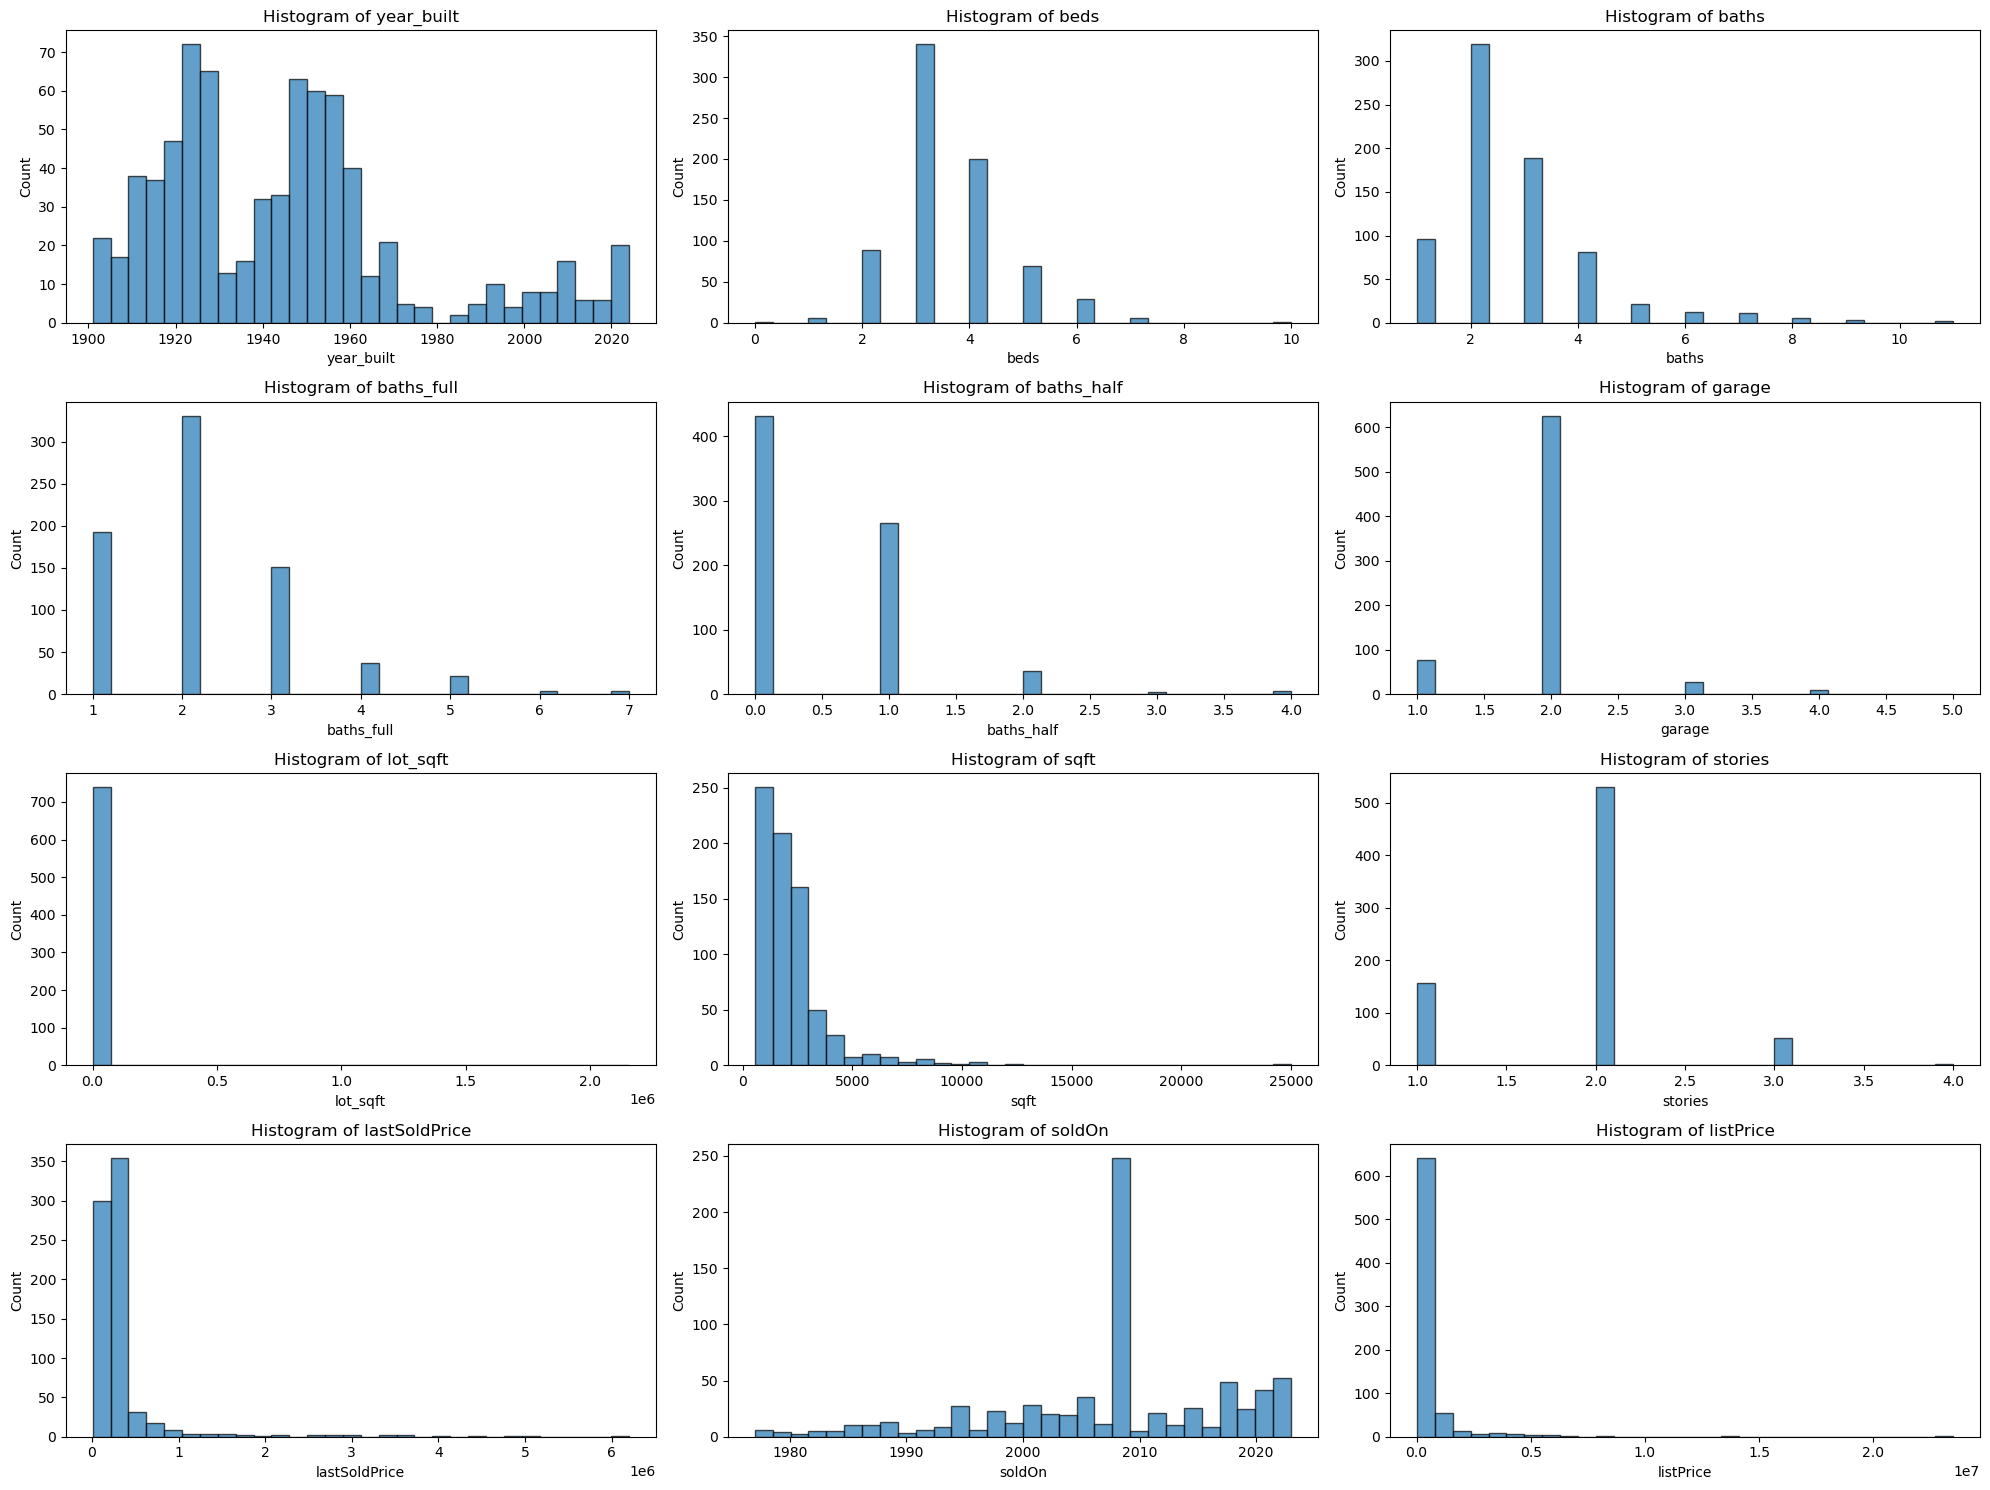

In [43]:
numeric_columns = ['year_built', 'beds', 'baths', 'baths_full', 'baths_half',
       'garage', 'lot_sqft', 'sqft', 'stories', 'lastSoldPrice', 'soldOn',
       'listPrice']

plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns):
    plt.subplot(4, 3, i+1)
    plt.hist(df_year[column], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

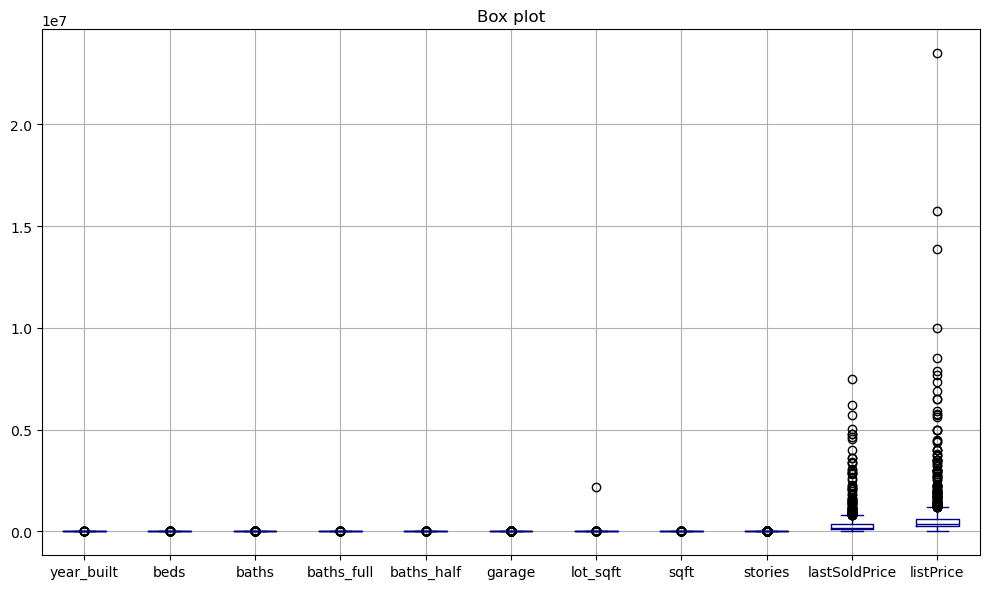

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace df with your actual DataFrame name

# Generate a box plot for all numeric columns
plt.figure(figsize=(10, 6))
df.boxplot(color='navy')
plt.title('Box plot')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [45]:
df_year.describe().round(3)

,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice
count,741.000,741.000,741.000,741.000,741.000,741.000,741.000,741.000,741.000,741.000,741.000,7.410000e+02
mean,1944.912,3.475,2.671,2.177,0.494,1.966,8556.368,2206.918,1.864,365093.180,2007.393,6.365225e+05
std,29.024,1.063,1.398,1.054,0.673,0.453,79037.957,1722.658,0.524,556928.041,10.040,1.313515e+06
min,1901.000,0.000,1.000,1.000,0.000,1.000,392.000,550.000,1.000,8500.000,1977.000,1.990000e+04
25%,1923.000,3.000,2.000,1.000,0.000,2.000,3750.000,1232.000,2.000,136000.000,2003.000,2.440000e+05
50%,1943.000,3.000,2.000,2.000,0.000,2.000,4720.000,1763.000,2.000,305000.000,2008.000,3.495000e+05
75%,1957.000,4.000,3.000,3.000,1.000,2.000,8556.368,2420.000,2.000,365093.180,2015.000,5.490000e+05
max,2024.000,10.000,11.000,7.000,4.000,5.000,2156000.000,25000.000,4.000,6200000.000,2023.000,2.350000e+07


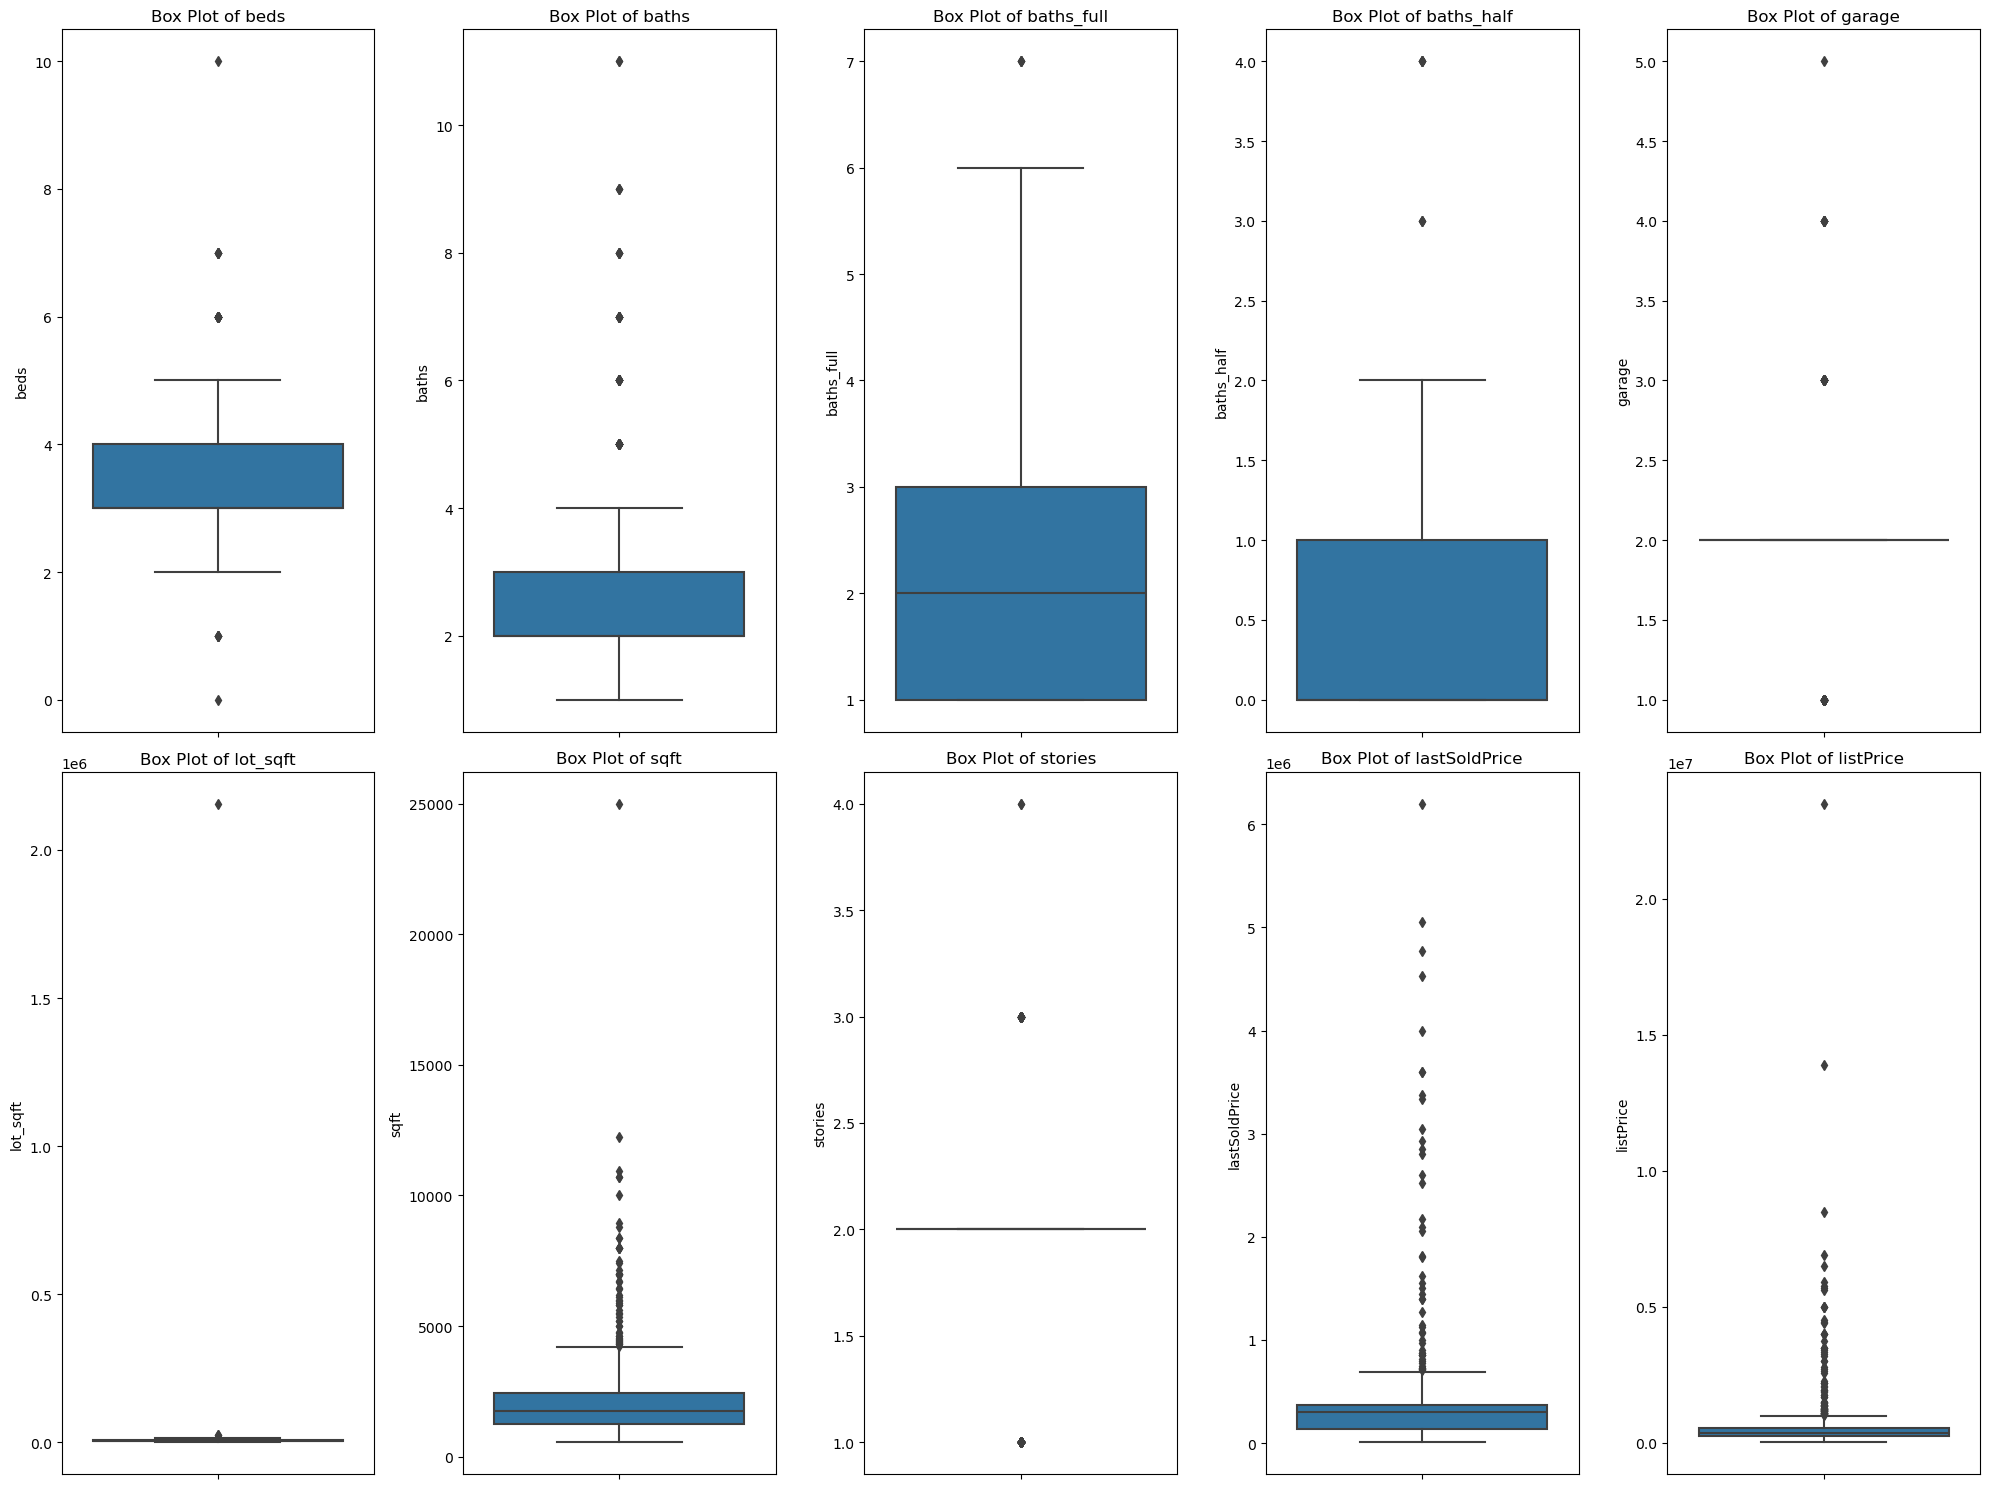

In [46]:
boxplot_columns = ['beds', 'baths', 'baths_full', 'baths_half',
       'garage', 'lot_sqft', 'sqft', 'stories', 'lastSoldPrice',
       'listPrice']
# Plot box plots for each column to identify outliers
plt.figure(figsize=(20, 15))
for i, column in enumerate(boxplot_columns):
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=df_year[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

In [47]:
df_year.shape

(741, 12)

In [48]:
# Function to calculate number of outliers
def count_outliers(column):
    Q1 = df_year[column].quantile(0.25)
    Q3 = df_year[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_year[(df_year[column] < lower_bound) | (df_year[column] > upper_bound)]
    return outliers.shape[0]

# Calculate number of outliers for each column
outliers_count = {column: count_outliers(column) for column in numeric_columns}
outliers_count

{'year_built': 42,
 'beds': 43,
 'baths': 56,
 'baths_full': 4,
 'baths_half': 8,
 'garage': 115,
 'lot_sqft': 5,
 'sqft': 53,
 'stories': 211,
 'lastSoldPrice': 48,
 'soldOn': 22,
 'listPrice': 79}

In [49]:
# Convert outliers_count to a DataFrame
outliers_df = pd.DataFrame(list(outliers_count.items()), columns=['Column', 'Nº of outliers'])
outliers_df

,Column,Nº of outliers
0,year_built,42
1,beds,43
2,baths,56
3,baths_full,4
4,baths_half,8
5,garage,115
6,lot_sqft,5
7,sqft,53
8,stories,211
9,lastSoldPrice,48


In [50]:
df_year[df_year['stories'] > 3]

,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice
607,1949.0,2.0,1.0,1.0,0.0,2.0,8556.368056,900.0,4.0,365093.180039,2008.0,115000.0
1195,1926.0,2.0,1.0,1.0,0.0,2.0,8556.368056,825.0,4.0,365093.180039,2008.0,31900.0


In [51]:
df_year[df_year['garage'] > 3]

,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice
326,1909.0,4.0,3.0,2.0,1.0,4.0,8712.000000,3712.0,3.0,1.570000e+05,1995.0,1399000.0
602,2010.0,5.0,6.0,5.0,1.0,4.0,10250.000000,7000.0,3.0,3.050000e+06,2022.0,4995900.0
754,2008.0,6.0,7.0,6.0,1.0,4.0,392.000000,8380.0,3.0,6.200000e+06,2022.0,5900000.0
851,1925.0,7.0,9.0,7.0,2.0,4.0,8556.368056,12250.0,2.0,3.650932e+05,2008.0,13900000.0
860,2024.0,6.0,8.0,6.0,2.0,4.0,6184.000000,8000.0,3.0,2.054000e+06,2023.0,5750000.0
1041,1927.0,4.0,4.0,3.0,1.0,4.0,6250.000000,7000.0,1.0,3.650932e+05,2008.0,3500000.0
1042,2009.0,6.0,8.0,5.0,3.0,4.0,5808.000000,8000.0,3.0,2.925000e+06,2019.0,3999000.0
1152,1995.0,5.0,9.0,5.0,4.0,4.0,6000.000000,10700.0,3.0,3.333333e+06,2008.0,6500000.0
1196,2011.0,10.0,11.0,7.0,4.0,4.0,6077.000000,10940.0,2.0,1.150000e+06,2002.0,4995000.0
1491,2013.0,5.0,6.0,4.0,2.0,5.0,8784.000000,8000.0,3.0,1.625000e+06,2011.0,5695000.0


In [52]:
# Filter out rows where 'stories' is greater than 2
df_year = df_year[df_year['garage'] <= 3]
df_year

,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice
0,1951.0,4.0,4.0,3.0,1.0,1.0,5615.000000,3000.000000,2.0,3.650932e+05,2008.0,750000.0
1,1922.0,4.0,3.0,2.0,1.0,2.0,6566.000000,2900.000000,2.0,1.050000e+05,1991.0,499900.0
2,1947.0,4.0,2.0,2.0,0.0,3.0,5375.000000,1170.000000,2.0,6.000000e+04,2019.0,325600.0
3,1945.0,4.0,3.0,2.0,1.0,2.0,6138.000000,2511.000000,2.0,1.700000e+05,1996.0,620000.0
4,1907.0,4.0,4.0,2.0,2.0,2.0,8476.000000,2870.000000,3.0,3.650932e+05,2008.0,850000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1989,2004.0,4.0,4.0,3.0,1.0,2.0,2520.000000,2206.918129,2.0,1.066000e+06,2019.0,1350000.0
1990,1953.0,3.0,1.0,1.0,0.0,2.0,3125.000000,900.000000,2.0,1.230000e+05,2006.0,153000.0
1991,1926.0,4.0,6.0,5.0,1.0,1.0,8556.368056,4350.000000,2.0,3.650932e+05,2008.0,1149000.0
1995,1961.0,3.0,2.0,2.0,0.0,2.0,8556.368056,2080.000000,1.0,1.480000e+05,2000.0,319900.0


In [53]:
# Function to calculate number of outliers
def count_outliers(column):
    Q1 = df_year[column].quantile(0.25)
    Q3 = df_year[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_year[(df_year[column] < lower_bound) | (df_year[column] > upper_bound)]
    return outliers.shape[0]

# Calculate number of outliers for each column
outliers_count = {column: count_outliers(column) for column in numeric_columns}
outliers_count

{'year_built': 37,
 'beds': 37,
 'baths': 47,
 'baths_full': 2,
 'baths_half': 5,
 'garage': 104,
 'lot_sqft': 5,
 'sqft': 48,
 'stories': 202,
 'lastSoldPrice': 40,
 'soldOn': 22,
 'listPrice': 72}

In [54]:
# Define the function to calculate and return outliers for a specific column
def get_outliers(df_year, column):
    Q1 = df_year[column].quantile(0.25)
    Q3 = df_year[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_year[(df_year[column] < lower_bound) | (df_year[column] > upper_bound)]
    return outliers

# Get and print the outliers for the 'sqft' column in df_year
sqft_outliers = get_outliers(df_year, 'sqft')
sqft_outliers

,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice
6,2013.0,5.0,5.0,4.0,1.0,2.0,3125.000000,4200.0,2.0,1.267500e+06,2015.0,1500000.0
15,1963.0,4.0,4.0,4.0,0.0,2.0,8390.000000,4632.0,2.0,8.750000e+05,2019.0,1075000.0
17,1925.0,5.0,4.0,3.0,1.0,2.0,8650.000000,4557.0,2.0,3.650932e+05,2008.0,1350000.0
19,2010.0,6.0,11.0,7.0,4.0,3.0,25975.000000,25000.0,3.0,3.650932e+05,2008.0,23500000.0
27,1958.0,5.0,5.0,4.0,1.0,2.0,11748.000000,6000.0,2.0,4.300000e+05,2022.0,649000.0
218,1927.0,5.0,5.0,4.0,1.0,2.0,12502.000000,4724.0,2.0,3.650932e+05,2008.0,949873.0
246,1929.0,5.0,4.0,2.0,2.0,2.0,12776.000000,6721.0,2.0,6.400000e+05,2004.0,998888.0
247,1915.0,5.0,7.0,3.0,4.0,2.0,13504.000000,5500.0,3.0,2.815000e+05,2010.0,1175000.0
257,2015.0,6.0,6.0,5.0,1.0,2.0,3125.000000,5200.0,3.0,3.375000e+06,2016.0,3399000.0
286,2017.0,5.0,7.0,5.0,2.0,2.0,3071.000000,6450.0,2.0,4.775000e+06,2022.0,4980000.0


In [55]:
sqft_outliers.corr()

,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice
year_built,1.000000,0.348492,0.271759,0.337245,0.064631,0.329798,-0.289569,0.105373,0.131233,0.254549,0.339925,0.258496
beds,0.348492,1.000000,0.270879,0.249595,0.171627,0.425317,0.076302,0.271712,0.230558,-0.008841,-0.032810,0.207371
baths,0.271759,0.270879,1.000000,0.837957,0.736975,0.209320,0.287043,0.659492,0.191663,0.311730,0.076630,0.662860
baths_full,0.337245,0.249595,0.837957,1.000000,0.248678,0.220514,0.151685,0.512785,0.030517,0.264333,0.019251,0.568990
baths_half,0.064631,0.171627,0.736975,0.248678,1.000000,0.098390,0.321581,0.535373,0.302372,0.225876,0.112162,0.471739
garage,0.329798,0.425317,0.209320,0.220514,0.098390,1.000000,-0.040812,0.244411,0.108999,0.029324,0.064088,0.250628
lot_sqft,-0.289569,0.076302,0.287043,0.151685,0.321581,-0.040812,1.000000,0.634640,0.049739,-0.324868,-0.208232,0.409960
sqft,0.105373,0.271712,0.659492,0.512785,0.535373,0.244411,0.634640,1.000000,0.229656,0.082094,-0.069717,0.891765
stories,0.131233,0.230558,0.191663,0.030517,0.302372,0.108999,0.049739,0.229656,1.000000,0.075850,0.008885,0.203281
lastSoldPrice,0.254549,-0.008841,0.311730,0.264333,0.225876,0.029324,-0.324868,0.082094,0.075850,1.000000,0.395350,0.261717


In [56]:
# Define the function to calculate and return outliers for a specific column
def get_outliers(df_year, column):
    Q1 = df_year[column].quantile(0.25)
    Q3 = df_year[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_year[(df_year[column] < lower_bound) | (df_year[column] > upper_bound)]
    return outliers

# Get and print the outliers for the 'sqft' column in df_year
listprice_outliers = get_outliers(df_year, 'listPrice')
listprice_outliers

,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice
6,2013.0,5.0,5.0,4.0,1.0,2.0,3125.000000,4200.000000,2.0,1.267500e+06,2015.0,1500000.0
12,2000.0,4.0,5.0,3.0,2.0,2.0,8556.368056,2206.918129,2.0,8.530000e+05,2003.0,1150000.0
15,1963.0,4.0,4.0,4.0,0.0,2.0,8390.000000,4632.000000,2.0,8.750000e+05,2019.0,1075000.0
17,1925.0,5.0,4.0,3.0,1.0,2.0,8650.000000,4557.000000,2.0,3.650932e+05,2008.0,1350000.0
19,2010.0,6.0,11.0,7.0,4.0,3.0,25975.000000,25000.000000,3.0,3.650932e+05,2008.0,23500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1958,1957.0,3.0,4.0,3.0,1.0,2.0,10725.000000,3336.000000,2.0,5.105000e+05,2015.0,1250000.0
1984,1990.0,4.0,4.0,3.0,1.0,2.0,2625.000000,3300.000000,3.0,3.448000e+05,1995.0,1250000.0
1987,1923.0,4.0,4.0,3.0,1.0,2.0,8556.368056,3600.000000,2.0,3.650932e+05,2008.0,1050000.0
1989,2004.0,4.0,4.0,3.0,1.0,2.0,2520.000000,2206.918129,2.0,1.066000e+06,2019.0,1350000.0


In [57]:
listprice_outliers.corr()

,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice
year_built,1.000000,0.168326,0.057709,0.089535,-0.010184,0.218003,-0.397418,0.017368,0.069068,0.144543,0.390700,0.091041
beds,0.168326,1.000000,0.532199,0.592244,0.205917,0.379768,0.170451,0.465516,0.200492,0.190230,-0.034077,0.383276
baths,0.057709,0.532199,1.000000,0.846267,0.729263,0.252745,0.338562,0.748790,0.212035,0.349346,-0.003549,0.693288
baths_full,0.089535,0.592244,0.846267,1.000000,0.252619,0.236779,0.214219,0.649798,0.175726,0.315762,-0.007620,0.620708
baths_half,-0.010184,0.205917,0.729263,0.252619,1.000000,0.154919,0.339750,0.525359,0.159396,0.228921,0.003340,0.461920
garage,0.218003,0.379768,0.252745,0.236779,0.154919,1.000000,0.082069,0.322450,0.009439,0.039665,0.099864,0.233855
lot_sqft,-0.397418,0.170451,0.338562,0.214219,0.339750,0.082069,1.000000,0.579970,-0.006747,-0.258408,-0.230518,0.433106
sqft,0.017368,0.465516,0.748790,0.649798,0.525359,0.322450,0.579970,1.000000,0.211607,0.193306,-0.041153,0.865427
stories,0.069068,0.200492,0.212035,0.175726,0.159396,0.009439,-0.006747,0.211607,1.000000,0.069517,-0.114051,0.167252
lastSoldPrice,0.144543,0.190230,0.349346,0.315762,0.228921,0.039665,-0.258408,0.193306,0.069517,1.000000,0.355651,0.265274


In [58]:
df_year.corr()

,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice
year_built,1.000000,0.089529,0.244362,0.198953,0.179555,0.119644,0.016866,0.190022,-0.015193,0.260536,0.072365,0.246730
beds,0.089529,1.000000,0.621061,0.598703,0.311824,0.197025,-0.013717,0.547399,0.378652,0.295298,0.069681,0.377173
baths,0.244362,0.621061,1.000000,0.871041,0.646470,0.217910,-0.041440,0.772900,0.406900,0.501224,0.150928,0.636571
baths_full,0.198953,0.598703,0.871041,1.000000,0.188337,0.199893,-0.039666,0.683791,0.367269,0.426650,0.165804,0.547487
baths_half,0.179555,0.311824,0.646470,0.188337,1.000000,0.125210,-0.021244,0.483248,0.243101,0.339459,0.044235,0.422385
garage,0.119644,0.197025,0.217910,0.199893,0.125210,1.000000,0.006804,0.223624,0.135810,0.126237,0.033995,0.196883
lot_sqft,0.016866,-0.013717,-0.041440,-0.039666,-0.021244,0.006804,1.000000,-0.012675,0.013645,0.001086,0.001629,-0.001846
sqft,0.190022,0.547399,0.772900,0.683791,0.483248,0.223624,-0.012675,1.000000,0.367962,0.459995,0.127012,0.820665
stories,-0.015193,0.378652,0.406900,0.367269,0.243101,0.135810,0.013645,0.367962,1.000000,0.255012,0.074523,0.267984
lastSoldPrice,0.260536,0.295298,0.501224,0.426650,0.339459,0.126237,0.001086,0.459995,0.255012,1.000000,0.257189,0.502159


In [59]:
# Columns to remove outliers from
columns_to_clean = ['beds', 'baths', 'baths_full', 'baths_half', 'lot_sqft', 'sqft', 'lastSoldPrice', 'listPrice']

# Function to remove outliers using IQR
def remove_outliers(df_year, column):
    Q1 = df_year[column].quantile(0.25)
    Q3 = df_year[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_year[(df_year[column] >= lower_bound) & (df_year[column] <= upper_bound)]

# Remove outliers for each specified column
for column in columns_to_clean:
    df_year = remove_outliers(df_year, column)

In [60]:
df_year.shape

(586, 12)

In [61]:
df_year.corr()

,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice
year_built,1.000000,-0.158814,-0.009681,-0.031534,0.026762,0.005313,-0.007653,-0.084424,-0.212403,0.047490,-0.040478,0.083719
beds,-0.158814,1.000000,0.383038,0.354793,0.083254,0.061905,0.003035,0.302455,0.271256,0.007486,-0.020767,0.173091
baths,-0.009681,0.383038,1.000000,0.725458,0.474211,0.061246,0.009055,0.519277,0.209278,0.064564,0.059002,0.487091
baths_full,-0.031534,0.354793,0.725458,1.000000,-0.261939,0.055790,-0.057041,0.470539,0.193855,0.017556,0.096471,0.408956
baths_half,0.026762,0.083254,0.474211,-0.261939,1.000000,0.014514,0.085663,0.126227,0.045475,0.068075,-0.040671,0.159873
garage,0.005313,0.061905,0.061246,0.055790,0.014514,1.000000,-0.048641,-0.012474,0.061024,-0.048573,-0.018073,-0.043672
lot_sqft,-0.007653,0.003035,0.009055,-0.057041,0.085663,-0.048641,1.000000,0.065365,0.055266,0.122097,-0.035373,0.014065
sqft,-0.084424,0.302455,0.519277,0.470539,0.126227,-0.012474,0.065365,1.000000,0.232117,0.168628,0.106264,0.507769
stories,-0.212403,0.271256,0.209278,0.193855,0.045475,0.061024,0.055266,0.232117,1.000000,0.097019,0.021664,0.095500
lastSoldPrice,0.047490,0.007486,0.064564,0.017556,0.068075,-0.048573,0.122097,0.168628,0.097019,1.000000,0.405188,0.288281


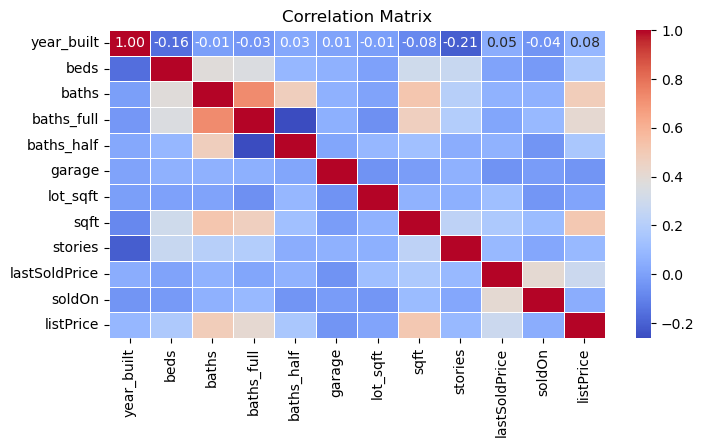

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
numeric_columns = df_year[['year_built', 'beds', 'baths', 'baths_full', 'baths_half',
       'garage', 'lot_sqft', 'sqft', 'stories', 'lastSoldPrice', 'soldOn',
       'listPrice']]

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

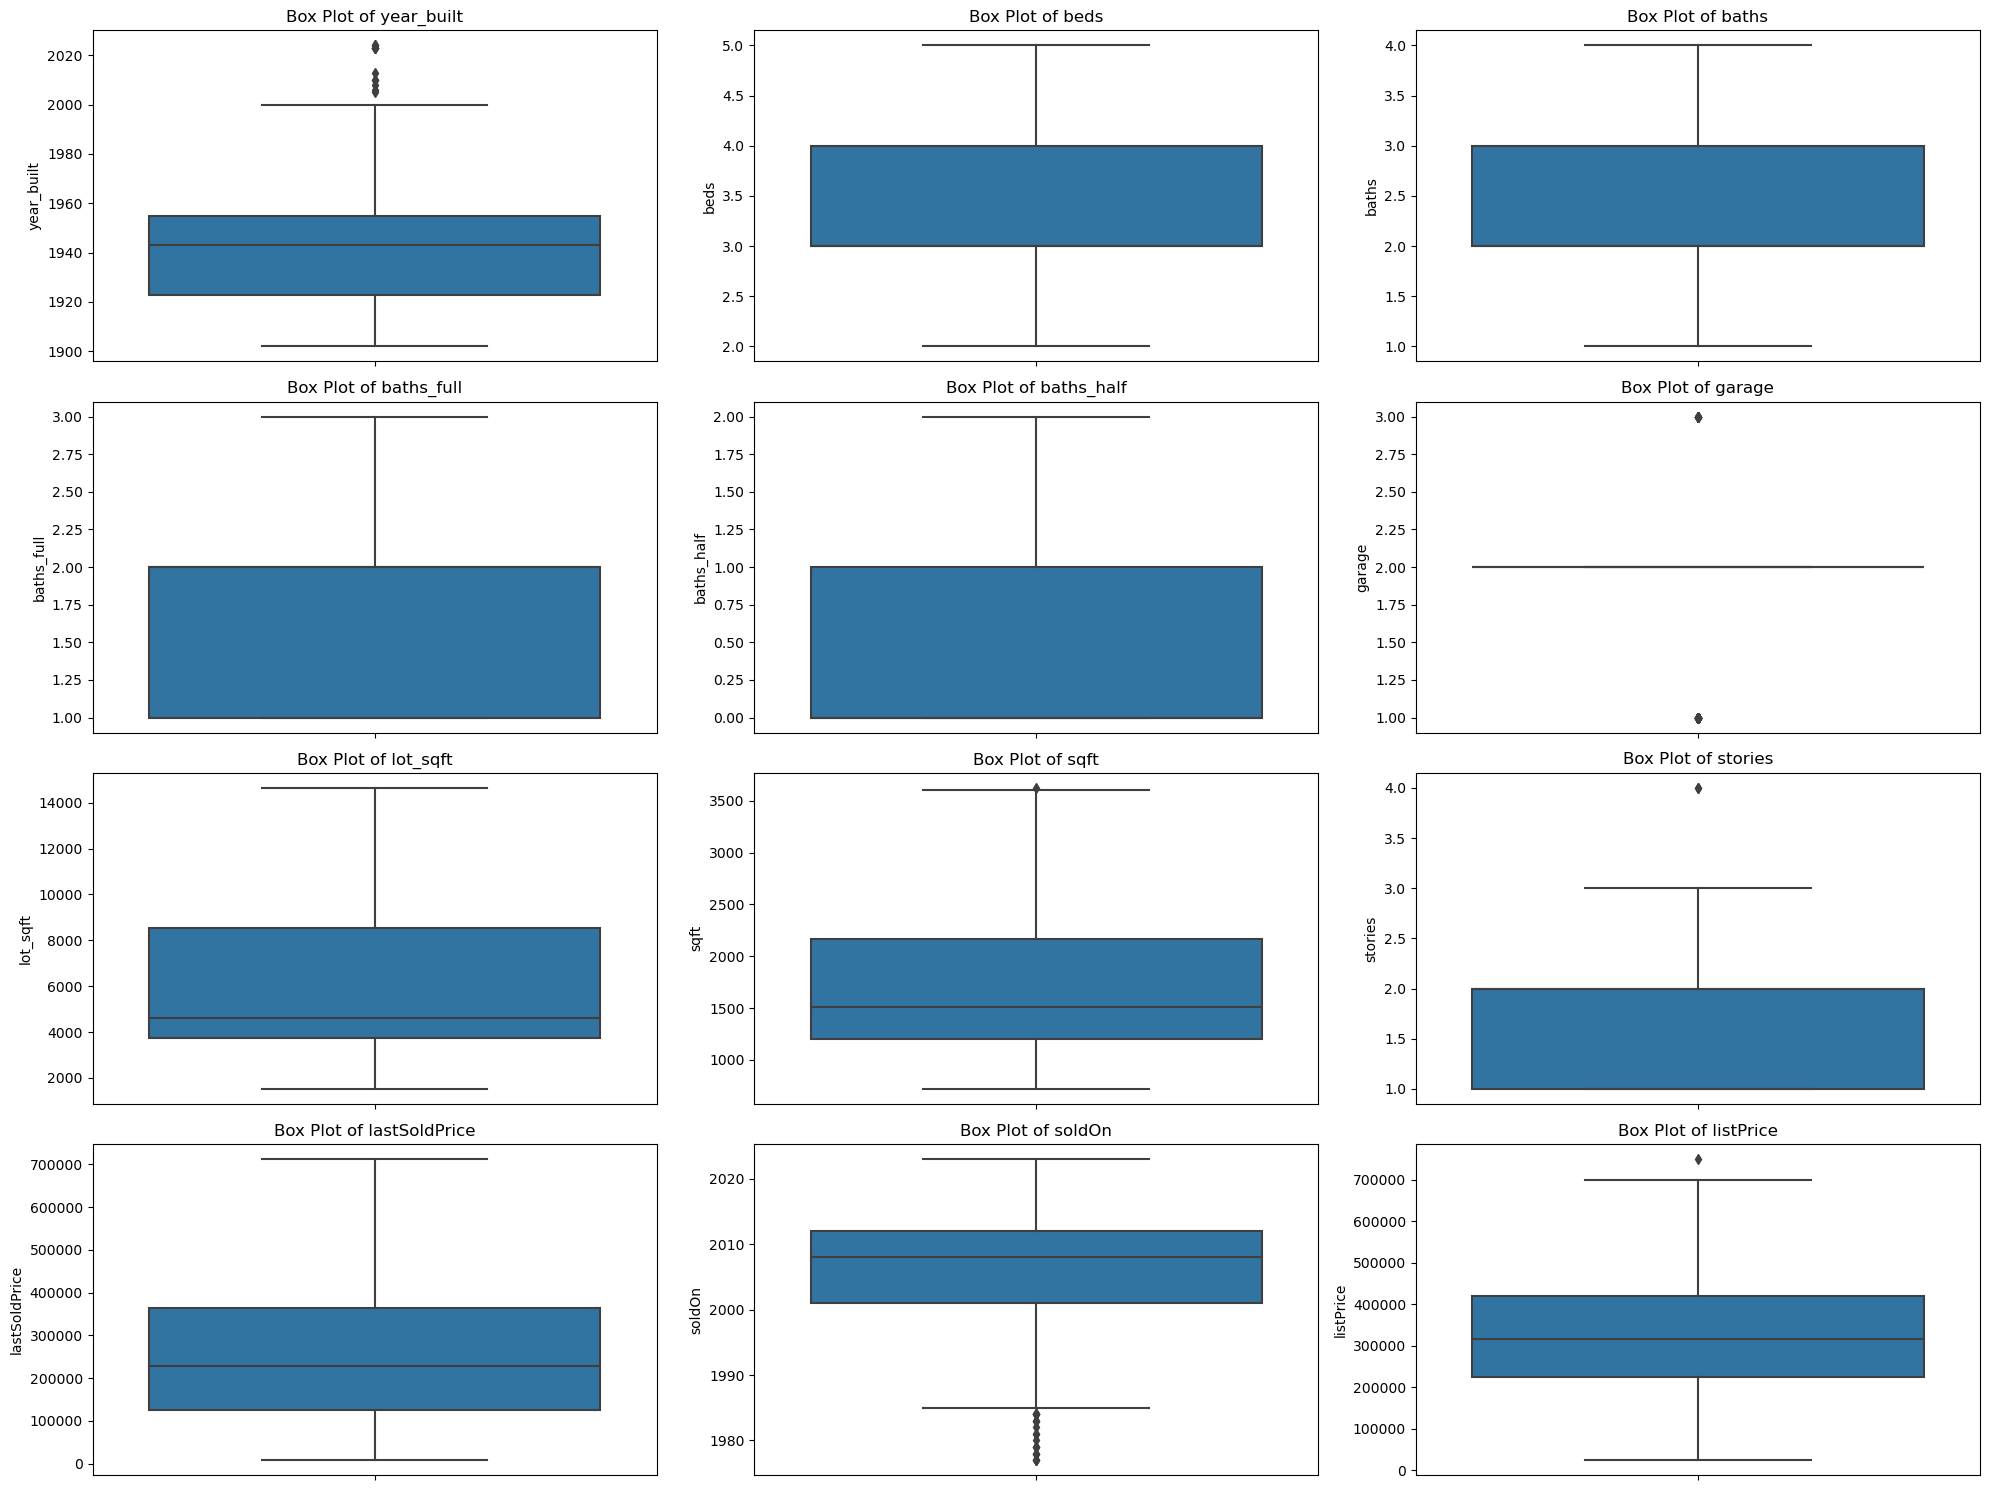

In [63]:
# Plot box plots for each column to identify outliers
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=df_year[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

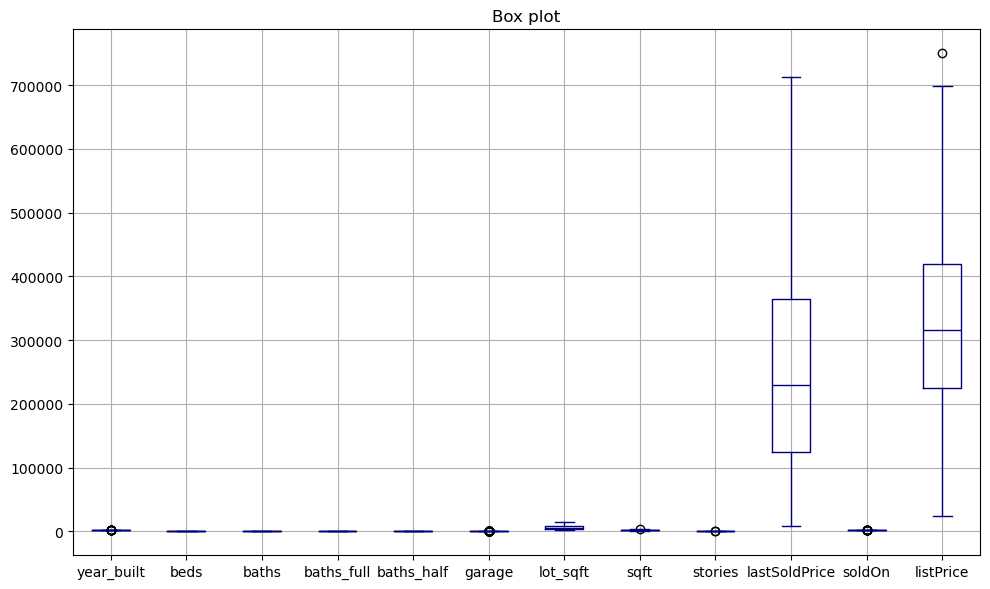

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace df with your actual DataFrame name

# Generate a box plot for all numeric columns
plt.figure(figsize=(10, 6))
df_year.boxplot(color='navy')
plt.title('Box plot')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

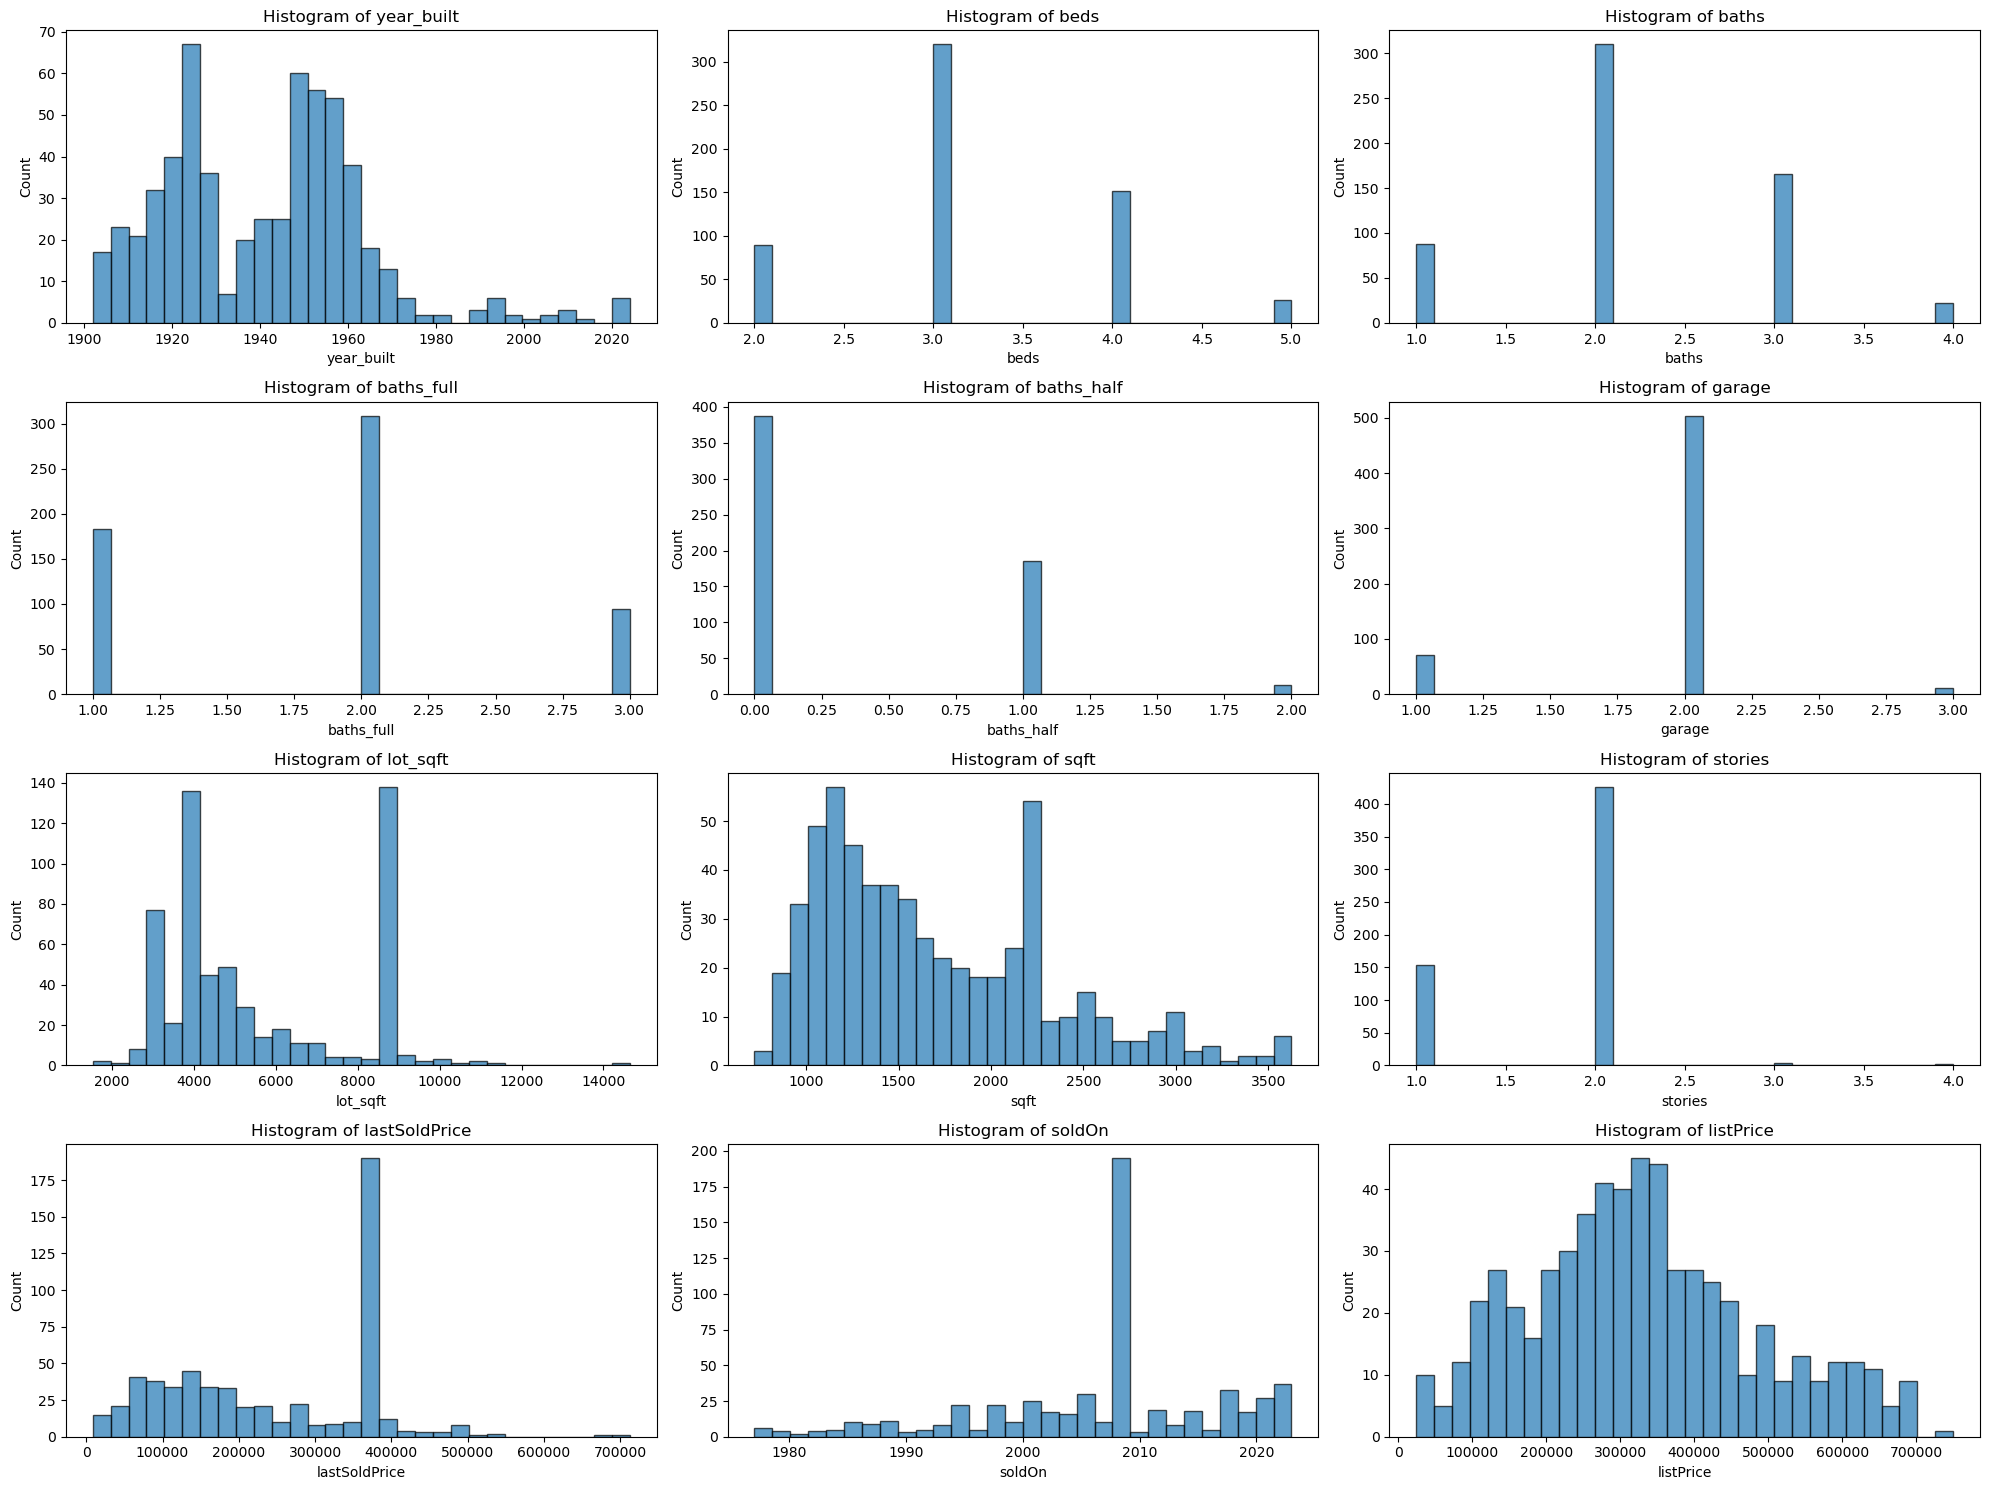

In [65]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns):
    plt.subplot(4, 3, i+1)
    plt.hist(df_year[column], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

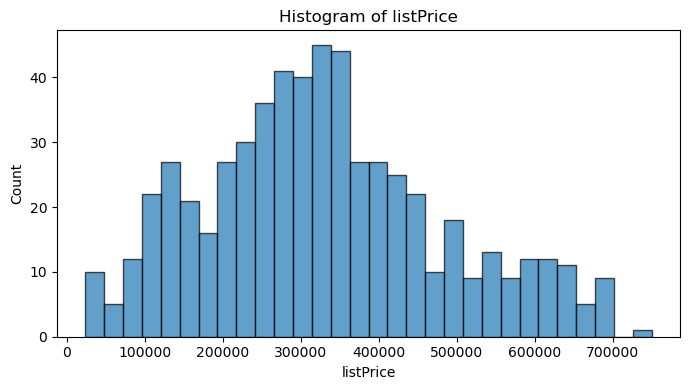

In [70]:
# Plotting the histogram for the listPrice column
plt.figure(figsize=(7, 4))
plt.hist(df_year[column], bins=30, edgecolor='black', alpha=0.7)
plt.title(f'Histogram of {column}')
plt.xlabel(column)
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [67]:
# Save the modified DataFrame to a new CSV file
df_year.to_csv('cleaned_realstate3.csv', index=False)